## This notebook shows how to use the pretrained CNNs included in Keras to classify images.

These networks were trained on the ImageNet dataset and provide classification for 1000 popular object categories.
In many cases, they might be enough, or you can directly use some of the prepackaged services that exist (e.g Microsoft Cognitive Services - specifically the Computer Vision service).

In [227]:
# import the necessary packages
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from imutils import paths
import numpy as np
import cv2

You can choose whatever network you want and try different images to see the results.  
All the networks can correctly classify all these images, but results vary slightly.

In [228]:
dataset = 'example_images'
model_name = 'resnet'

In [229]:
# define a dictionary that maps model names to their classes
# inside Keras
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception,  # TensorFlow ONLY
    "resnet": ResNet50
}

In [230]:
# esnure a valid model name was supplied
if model_name not in MODELS.keys():
    raise AssertionError("The model argument should "
        "be a key in the `MODELS` dictionary")

In [231]:
# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

In [232]:
# if we are using the InceptionV3 or Xception networks, then we
# need to set the input shape to (299x299) [rather than (224x224)]
# and use a different image processing function
if model_name in ("inception", "xception"):
    inputShape = (299, 299)
    preprocess = preprocess_input

In [233]:
# load our the network weights from disk (NOTE: if this is the
# first time you are running this script for a given network, the
# weights will need to be downloaded first -- depending on which
# network you are using, the weights can be 90-575MB, so be
# patient; the weights will be cached and subsequent runs of this
# script will be *much* faster)
print("[INFO] loading {}...".format(model_name))
Network = MODELS[model_name]
model = Network(weights="imagenet")

[INFO] loading resnet...


In [234]:
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network
print("[INFO] loading and pre-processing images...")
imagePaths = list(paths.list_images(dataset))

processedImages = []
for input_image in imagePaths:
    image = load_img(input_image, target_size=inputShape)
    image = img_to_array(image)
    processedImages.append(image)

[INFO] loading and pre-processing images...


In [235]:
# our input image are now represented as a NumPy array of shape
images = np.array(processedImages)
print(images.shape)

(8, 224, 224, 3)


In [236]:
# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
images = preprocess(images)

In [237]:
# classify the image
print("[INFO] classifying images with '{}'...".format(model_name))
preds = model.predict(images)
P = imagenet_utils.decode_predictions(preds)

[INFO] classifying images with 'resnet'...


In [238]:
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (j,p) in enumerate(P):
    print('Predictions for image %d' %j)
    for (i, (imagenetID, label, prob)) in enumerate(p):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

Predictions for image 0
1. pool_table: 100.00%
2. restaurant: 0.00%
3. grocery_store: 0.00%
4. dining_table: 0.00%
5. butcher_shop: 0.00%
Predictions for image 1
1. koala: 100.00%
2. wombat: 0.00%
3. guenon: 0.00%
4. indri: 0.00%
5. Madagascar_cat: 0.00%
Predictions for image 2
1. sports_car: 83.43%
2. minivan: 8.74%
3. car_wheel: 3.14%
4. cab: 2.19%
5. racer: 0.94%
Predictions for image 3
1. soccer_ball: 99.95%
2. golf_ball: 0.02%
3. ladybug: 0.01%
4. rugby_ball: 0.00%
5. football_helmet: 0.00%
Predictions for image 4
1. canoe: 80.69%
2. paddle: 19.03%
3. sandbar: 0.05%
4. bathing_cap: 0.04%
5. catamaran: 0.04%
Predictions for image 5
1. cheeseburger: 99.97%
2. bagel: 0.03%
3. meat_loaf: 0.00%
4. hotdog: 0.00%
5. bakery: 0.00%
Predictions for image 6
1. beagle: 99.61%
2. Walker_hound: 0.14%
3. bluetick: 0.14%
4. basset: 0.02%
5. Brittany_spaniel: 0.01%
Predictions for image 7
1. beer_glass: 99.95%
2. goblet: 0.03%
3. beer_bottle: 0.01%
4. eggnog: 0.01%
5. vase: 0.00%


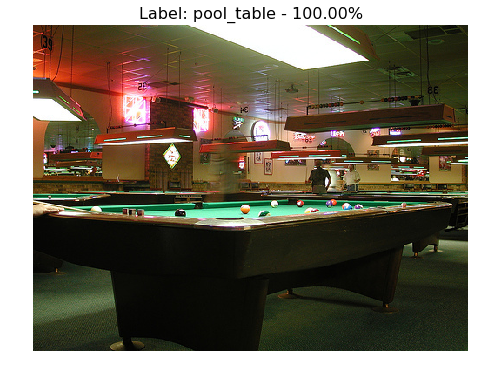

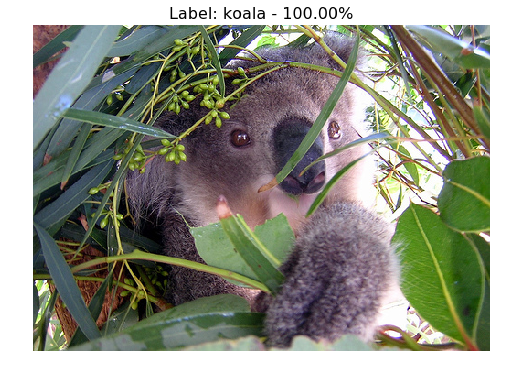

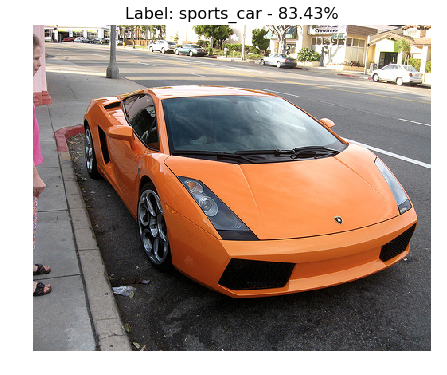

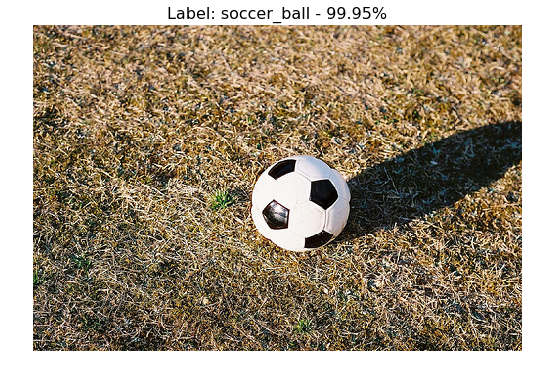

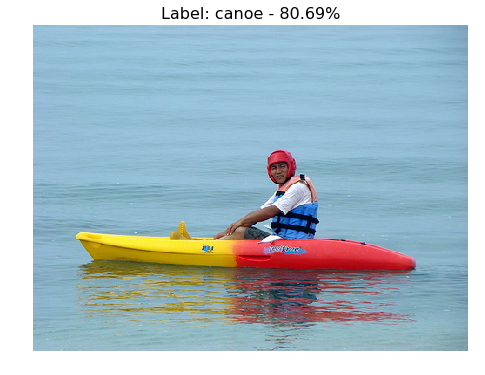

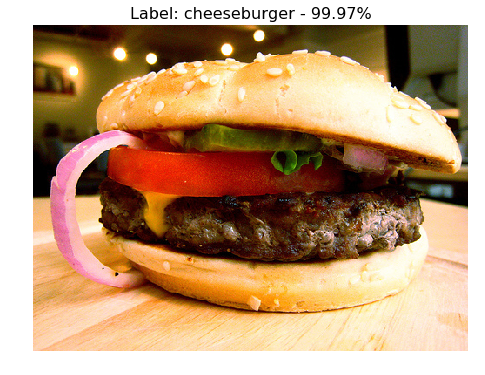

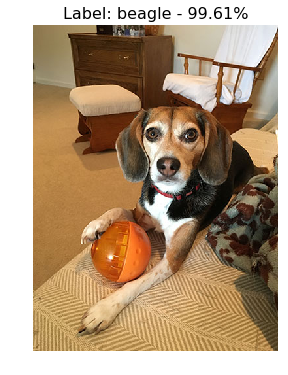

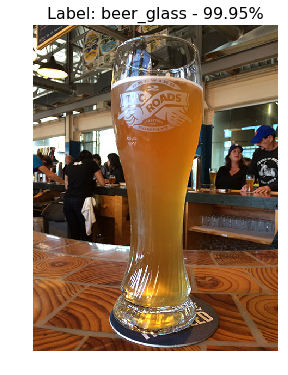

In [239]:
import matplotlib.pyplot as plt
%matplotlib inline

# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen
for (i, input_image) in enumerate(imagePaths):
    orig = cv2.imread(input_image)
    (imagenetID, label, prob) = P[i][0]
    plt.figure(figsize=(12,6))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    plt.title('Label: %s - %.2f%%' % (label, prob * 100), fontsize=16)
    plt.show()